In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Prompt
Team Network wants to target facilities that are likely to join and convert to Parachute. 
Given this dataset, come up with a data-driven way for Team Network to target these facilities.

# Questions:
- How would you define conversion?
- Other than conversion, are there other metrics you would consider?
- Are there facility features that impact conversion?
- How would you prioritize which facilities to target?

In [33]:
df = pd.read_csv('/Users/kevinjay/Downloads/sample_facilities.csv')
df

,facility_id,facility_type,created_at,address_state,agreement_signed_at,activated_at,converted_at,n_orders_created
0,C9E2X-RMJE-B3HZ9,ambulatory_practice,2022-07-29 17:53:01.931365,OH,2022-07-29 17:53:01.984443,2022-07-29 17:56:17.654838,NaN,2.0
1,FG-AU58B-IPJ6-RP,nursing_or_rehab,2022-03-02 18:13:27.553456,CO,2022-03-02 18:13:27.590021,2022-03-02 18:14:50.732274,2022-05-20 21:33:04.986143,32.0
2,V7U-2QEN8-0PN-MS,ambulatory_practice,2023-08-25 19:59:56.591827,NH,2023-08-25 19:59:56.666168,2023-09-13 20:40:31.508122,NaN,2.0
3,AVX03-23-APYP-K7,ambulatory_practice,2023-04-25 16:37:42.885949,OH,NaN,NaN,NaN,1.0
4,6SQ-N237-AGCP-SC,ambulatory_practice,2022-11-16 19:55:48.251353,TN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
17462,HB0-2A-NX0-20CJB,ambulatory_practice,2023-09-21 01:21:54.708934,NV,2023-09-21 18:08:20.964333,2023-09-21 18:30:22.031492,NaN,1.0
17463,FLNH-RPMPK-XD-ZQ,dialysis_center,2023-03-07 18:18:36.486488,KY,2023-03-07 18:18:36.521318,2023-03-07 18:19:54.721439,NaN,2.0
17464,F14-Z8SR-QAD-9QP,ambulatory_practice,2022-06-16 18:39:02.701571,MO,2022-06-16 18:49:55.781964,2022-06-16 18:51:26.729738,NaN,1.0
17465,SZ0-T6-GYJ41-528,ambulatory_practice,2023-09-22 18:32:26.448898,TX,2023-09-22 18:32:26.503911,2023-09-22 18:33:50.646798,NaN,3.0


In [35]:
# Start by looking at all data 
df['converted'] = np.where(df['converted_at'].isna(), 0, 1)

# Count the number of facilities per type
value_counts = pd.DataFrame(df.facility_type.value_counts())

# Sum the number of orders_created
orders_created_counts = df.groupby(["facility_type"]).n_orders_created.sum().reset_index()

# Sum the number of converted Facilities
converted = df.groupby(["facility_type"]).converted.sum().reset_index()

# Join data together and divide columns 
counts = value_counts.merge(converted, on='facility_type', how='left')
counts['percent_converted'] = counts['converted'] / counts['count']

counts = counts.merge(orders_created_counts, on='facility_type', how='left')

counts['orders_per_facility_type'] = counts['n_orders_created'] / counts['count']
counts

,facility_type,count,converted,percent_converted,n_orders_created,orders_per_facility_type
0,ambulatory_practice,12053,4833,0.400979,380573.0,31.574961
1,nursing_or_rehab,2102,1156,0.549952,61071.0,29.053758
2,hospital,1298,548,0.422188,113752.0,87.636364
3,home_health,816,316,0.387255,28142.0,34.487745
4,doctor_office,711,2,0.002813,1796.0,2.526020
5,sleep_lab,189,80,0.423280,33007.0,174.640212
6,cancer_center,124,40,0.322581,1139.0,9.185484
7,hospice,122,66,0.540984,11553.0,94.696721
8,dialysis_center,51,11,0.215686,207.0,4.058824
9,recert,1,0,0.000000,0.0,0.000000


<Axes: xlabel='facility_type'>

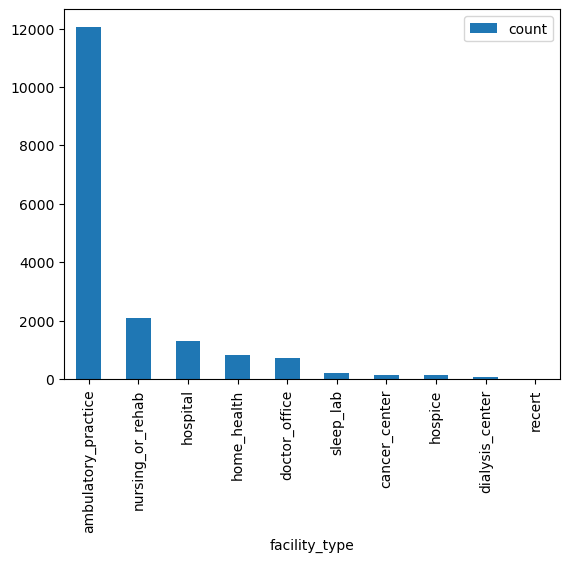

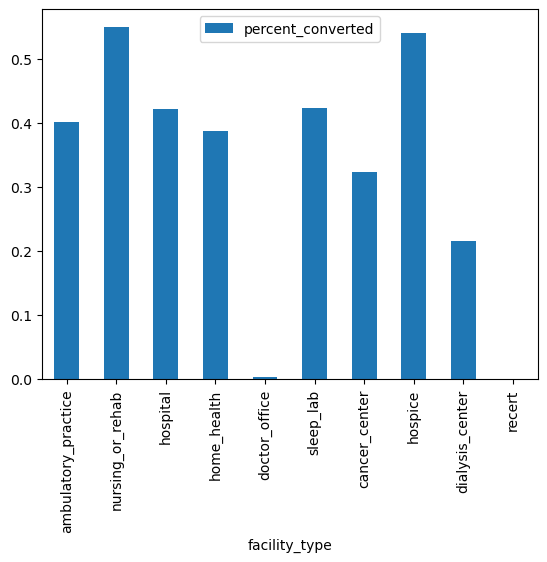

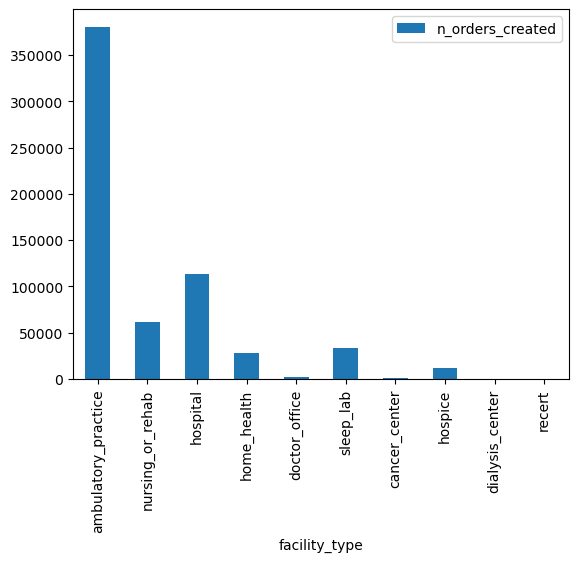

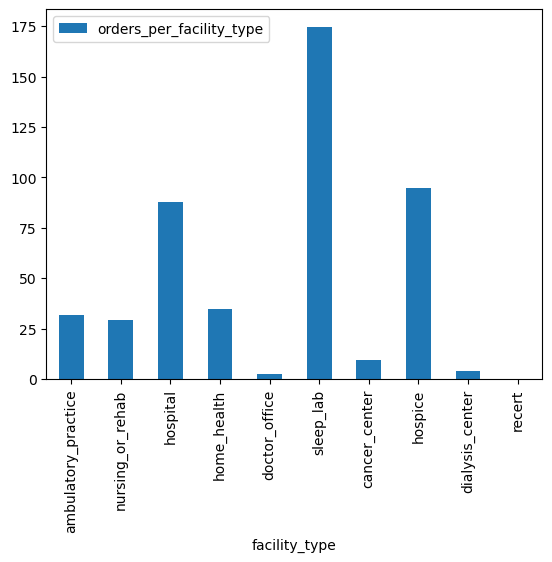

In [13]:
# Vizualize the data first 

counts.plot.bar(x='facility_type', y='count')
counts.plot.bar(x='facility_type', y='percent_converted')
counts.plot.bar(x='facility_type', y='n_orders_created')
counts.plot.bar(x='facility_type', y='orders_per_facility_type')

# What did we learn? 
# Across all facility_types, Ambulatory_practice has the most facilities, average conversion rate, and lower rate of orders per facility. 
# Sleep lab has a low number of facilities, but has the highest orders per facility. 
# Recert and Dialysis center are both low facility count and low orders per facility. 


# How would I define conversion? 

Conversion is defined by the converted_at column name being non-null. 

I then determined the attributes of being converted, like time to conversion and the number of orders for those converted facilities and looked the rest of the data to determine if there are facilities who behave like converted facilities but are not officially converted yet. 

This yielded 28 facilities that behave like converted facilites but are not officially converted yet. This would be an ideal starting point for the Network Team to target for conversion. 

In [61]:
# How would I define conversion? 

# select all converted rows
con_df = df.loc[df['converted'] == 1]

# Find the following: Average time to conversion (conversion - agreement_signed_at) and average orders per week/month/etc?
# Use that information to find facilities who meet the converted criteria and target them for conversion

conversion_timedelta = pd.to_datetime(con_df['converted_at']) - pd.to_datetime(con_df['agreement_signed_at'])
avg_time_to_conversion = conversion_timedelta.mean()
mdn_time_to_conversion = conversion_timedelta.median()


converted_avg_orders = con_df.n_orders_created.mean()
converted_mdn_orders = con_df.n_orders_created.median()

max_converted_at_timestamp = max(con_df.converted_at)


# Take last Day for a converted record and use that as the "downloaded date" and find all facilities more than the avg number of days to conversion and higher than mean number of orders per facility 
target_df_avg = df.loc[(df['converted'] == 0) 
                   & (pd.to_datetime(max_converted_at_timestamp) - pd.to_datetime(df.agreement_signed_at) > avg_time_to_conversion)
                   & (df.n_orders_created > converted_avg_orders)]
target_df_mdn = df.loc[(df['converted'] == 0) 
                   & (pd.to_datetime(max_converted_at_timestamp) - pd.to_datetime(df.agreement_signed_at) > mdn_time_to_conversion)
                   & (df.n_orders_created > converted_mdn_orders)]

target_df_mdn

,facility_id,facility_type,created_at,address_state,agreement_signed_at,activated_at,converted_at,n_orders_created,converted
248,3BZE-FQ-EUAY6-U8,nursing_or_rehab,2022-02-17 16:35:02.767574,TX,2022-02-17 16:35:02.797346,2022-10-17 21:44:53.354522,NaN,53.0,0
1080,XBK-9X1QZ-B8-DBU,ambulatory_practice,2022-07-06 16:36:01.030171,NV,2022-07-27 22:24:34.154796,2022-07-27 22:28:41.316230,NaN,56.0,0
1674,9EL-HBN-N1VYU-MR,ambulatory_practice,2023-04-26 20:08:52.994354,NY,2023-04-26 20:08:53.032049,2023-04-26 20:13:26.595171,NaN,35.0,0
2850,I8D-P5-B8ET2-9QT,ambulatory_practice,2023-02-10 16:46:20.366144,OH,2023-02-10 16:46:20.397961,2023-03-08 20:41:38.419519,NaN,52.0,0
2861,26-HT05-DMRNQ-AY,sleep_lab,2022-08-23 18:46:26.753475,AL,2022-09-01 23:55:46.442327,NaN,NaN,236.0,0
3442,HC6TI-CX7-FC-CXU,ambulatory_practice,2023-02-28 19:56:45.978230,OH,2023-04-25 16:00:02.452325,2023-05-08 20:32:47.454155,NaN,105.0,0
4839,Z2-ZV05-RVZ-MND5,ambulatory_practice,2022-03-29 17:00:22.633743,AL,2022-03-29 17:00:22.699039,2022-04-18 17:27:17.934060,NaN,260.0,0
4934,78P-YG0YS-YZ1-F6,ambulatory_practice,2022-09-13 18:19:02.278607,AL,2022-09-13 18:19:02.335759,NaN,NaN,150.0,0
5332,4U-KC-EXP-FI3-Y6,ambulatory_practice,2022-12-16 19:07:22.145216,CA,2022-12-16 19:07:22.167352,NaN,NaN,30.0,0
5341,8RUQE-UGY0-G0-BX,ambulatory_practice,2023-02-13 17:24:43.289316,MS,2023-02-13 17:24:43.348670,NaN,NaN,37.0,0


# Other than conversion, are there other metrics you would consider?
- I would consider the number of orders per facility type to determine if there is a type of facility for the Network team to pursue for conversion. 
- There are 109 unconverted sleep labs with an average of 14 orders per facility that Parachute is missing out on. This is an ideal population for Parachute to target. 
- Notice that Ambulatory Practices account for the massive majority of all facility types, and therefore also the unconverted facility types.  If there is a way to commicate Parachutes value at a Ambulatory Practice conference or otherwise target these facailites in particular that would be a great way to grow the network. 


In [45]:
# lets look at the unconverted 

uncon_df = df.loc[df['converted'] == 0]

uncon_value_counts = pd.DataFrame(uncon_df.facility_type.value_counts())
uncon_orders_created_counts = uncon_df.groupby(["facility_type"]).n_orders_created.sum().reset_index()

uncon_counts = uncon_value_counts.merge(uncon_orders_created_counts, on='facility_type', how='left')
uncon_counts['orders_per_facility_type'] = uncon_counts['n_orders_created'] / uncon_counts['count']

uncon_counts

,facility_type,count,n_orders_created,orders_per_facility_type
0,ambulatory_practice,7220,15854.0,2.195845
1,nursing_or_rehab,946,1353.0,1.430233
2,hospital,750,1620.0,2.160000
3,doctor_office,709,1566.0,2.208745
4,home_health,500,915.0,1.830000
5,sleep_lab,109,1564.0,14.348624
6,cancer_center,84,194.0,2.309524
7,hospice,56,71.0,1.267857
8,dialysis_center,40,61.0,1.525000
9,recert,1,0.0,0.000000


# Are there facility features that impact conversion?

In [58]:

converted_state_counts = df.groupby(["address_state"]).converted.sum().reset_index()
state_counts = pd.DataFrame(df.address_state.value_counts())


state_df = state_counts.merge(converted_state_counts, on='address_state', how='left')

state_df['converted_percent'] = state_df['converted'] / state_df['count']

# state_df.converted_percent.describe()

state_df.head(10)

# Conversion rate by state is actually pretty consistent between 36%-47%, hovering around 40%
# Conversion by state doesn't necessarily match population sizes. 
# CA should logically have the most facilities since that is the biggest state in the US yet its 4th. 
# Ohio should not be in 3rd place, its 7th in population. 

# This indicates to me that Parachute needs to focus on growing in markets that have more facilities, i.e. more patients/people 



,address_state,count,converted,converted_percent
0,TX,1834,741,0.404035
1,FL,1103,408,0.369900
2,OH,952,324,0.340336
3,CA,924,377,0.408009
4,NY,909,332,0.365237
5,PA,907,341,0.375965
6,VA,741,345,0.465587
7,MI,690,321,0.465217
8,IL,672,233,0.346726
9,TN,610,287,0.470492


# How would you prioritize which facilities to target?

